# Assessment Problems: Computer Infrastructure

## Imports

In [1]:
# Dates and times
import datetime as dt

# Numerical computing
import numpy as np

# Stock data from Yahoo Finance
import yfinance as yf

# Dataframes
import pandas as pd

# Data directory
from pathlib import Path 

# Plotting
import matplotlib.pyplot as plt

## Problem 1: Data from yfinance

https://ranaroussi.github.io/yfinance/

For this problem, I must:
- Write a function called `get_data()`
- This function downloads all hourly data from 5 companies from the past 5 days 
- The 5 companies are the 5 FAANG stocks: Facebook (META), Apple (AAPL), Amazon (AMZN), Netflix (NFLX), & Google (GOOG)
- The function will save the data into the folder `data` and each filename will be in the following format: `YYYYMMDD-HHmmss.csv`

##### First, I used the `yf.Tickers` function to identify the stocks I needed.

In [2]:
# Identify the stocks I want to download
tickers = yf.Tickers('META AAPL AMZN NFLX GOOG')

##### I had a look on https://algotrading101.com/learn/yfinance-guide/ to get a better idea of how to get the data and how to ask for a 5 day period with 1 hour intervals.
##### Unfortunately, I got an error saying 'Too Many Requests. Rate limited. Try after a while.' 

In [3]:
# Download the data
df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')

C:\Users\ZMH\AppData\Local\Temp\ipykernel_30456\3892786849.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h')
[*********************100%***********************]  5 of 5 completed


Then I saved the dataframe to a CSV file (Ian McLoughlin, Lecture videos Week 5)

In [ ]:
# COMMENTED OUT -it saves an extra CSV to the root)
# Current datetime
#now = dt.datetime.now()

# Filename
#filename = now.strftime("%Y%m%d-%H%M%S") + ".csv"

# Save to a CSV file with the current date and time as the filename
#df.to_csv(filename)

Now to put it all together into a function. 

I wasn't sure how to save it into the `data` folder so I checked the Pandas `.to_csv()` documentation (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)

I found out that I needed to import `pathlib` or `os` to use a data directory.

In [5]:
# Function (putting it all together)

def get_data():
    # Download the data
    df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'],
                     period='5d', interval='1h')

    # Build folder and filename
    folder = Path().resolve() / "data"
    folder.mkdir(parents=True, exist_ok=True)

    filename = dt.datetime.now().strftime("%Y%m%d-%H%M%S") + ".csv"
    filepath = folder / filename

    # Save the file
    df.to_csv(filepath)

    return filepath

In [6]:
get_data()

C:\Users\ZMH\AppData\Local\Temp\ipykernel_30456\4055554054.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'],
[*********************100%***********************]  5 of 5 completed


WindowsPath('C:/Users/ZMH/OneDrive/Desktop/COMPINFRASTRUCTURE/computer-infrastructure-assessment/data/20251202-134510.csv')

## Problem 2: Plotting Data

The main objectives for this problem are the following:
 - Write a function called `plot_data()` 
 - This function opens the latest data file in the `data` folder and, on one plot, plots the Close prices for each of the five stocks. 
 - The function should save the plot into the `plots` folder in the format YYYYMMDD-HHmmss.png.


WindowsPath('C:/Users/ZMH/OneDrive/Desktop/COMPINFRASTRUCTURE/computer-infrastructure-assessment/plots/20251202-134510.png')

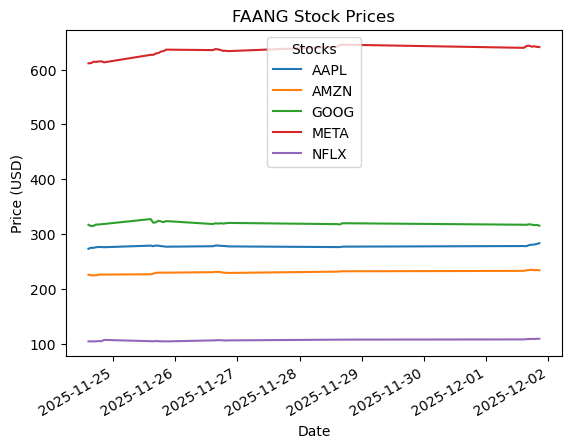

In [7]:
def plot_data():
    # Open latest file in data folder
    folder = Path().resolve() / "data"
    latest_file = max(folder.glob("*.csv"), key=lambda x: x.stat().st_mtime)
    df = pd.read_csv(latest_file, header=[0,1], index_col=0, parse_dates=True)
    # Plot closing prices
    df[('Close')].plot()
    # Add title and labels
    plt.title("FAANG Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    # Show legend
    plt.legend(title="Stocks")
    # Save figure to folder 'plots'
    folder = Path().resolve() / "plots"
    fig_filename = latest_file.stem + ".png"
    plt.savefig(folder / fig_filename)
    return folder / fig_filename

plot_data()

## Problem 3: Script

In this section I must:
- Create a Python script called faang.py in the root of my repository. 
- Copy the above functions into it and make it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. 

First I created the `faang.py` file in the root of my repository.

Then I imported the necessary modules.

In [8]:
"""
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import datetime as dt
"""

'\nimport yfinance as yf\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom pathlib import Path\nimport datetime as dt\n'

After that, it was time to paste in the code for my functions `get_data()` and `plot_data()`. I took this code straight from the above cells in Problem 1 and 2.

I then created a function `main()` to give me a sanity check for when I run the other functions.

Then I used the `if __name__ == "__main__":` line to make my file accessible as a standalone script.

ChatGPT helped me come up with these lines of code [See: https://chatgpt.com/share/692ef5f0-bdf0-800c-8570-4d2775819ff9]

In [ ]:
# Script 
def main():
    csv_path = get_data()
    print(f"Saved data to: {csv_path}")

    plot_path = plot_data()
    print(f"Saved plot to: {plot_path}")

# Ensure script runs when called directly
if __name__ == "__main__":
    main()

## Problem 4: Automation

## End